## **Codebasics - Bag of N grams tutorial**

### Let's first understand how to generate n-grams using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

**1-gram (bag of words)**

In [ ]:
v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

#this outputs single tokens only (BOW)

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

**bi-gram**

In [ ]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

#this outputs single token & pair of tokens

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

**tri-gram**

In [ ]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

#this outputs single single token, pair of tokens & three tokens

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

We will not take a simple collection of text documents, preprocess them to remove stop words, lemmatize etc and then generate bag of 1 grams and 2 grams from it

In [ ]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [ ]:
import spacy

In [9]:
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)

    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

### test the inuts

In [10]:
preprocess("thor ate pizza")

'thor eat pizza'

In [11]:
preprocess("loki is tall")

'loki tall'

In [12]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [14]:
corpus_processed = [preprocess(text) for text in corpus]

corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

### **creating bag of n-grams vocabullary and transform into vector**

In [15]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed) #this creates the vocabuallry
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}


Now generate bag of n gram vector for few sample documents

In [16]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])


Let's take a document that has out of vocabulary (OOV) term and see how bag of ngram generates vector out of it

In [20]:
v.transform(["hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

**vector output graph**

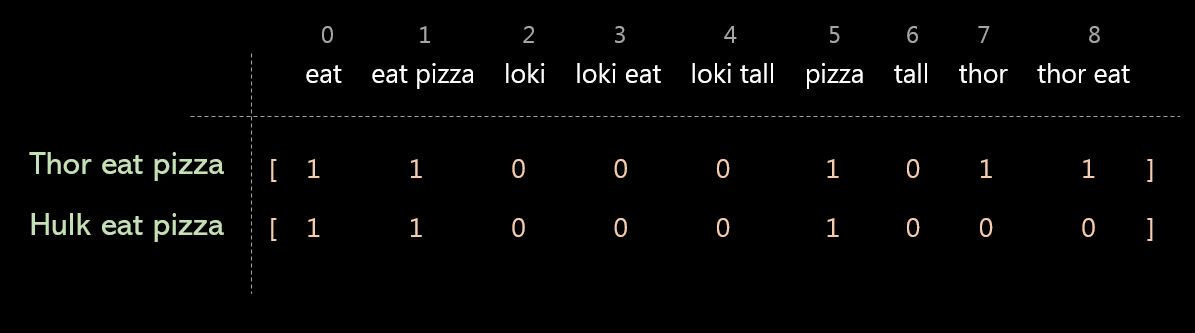

## **News Category Classification Problem**

Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

1.   BUSINESS
2.   SPORTS
3.   CRIME
4.   SCIENCE

### **Dataset**

Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65


*   This data consists of two columns. - Text - Category
*   Text is a news article
*   Category can be one of these 4: 'BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE', to keep things simple I trimmed additional categories from the original dataset


In [21]:
import pandas as pd

In [22]:
df = pd.read_json("/news_dataset.json")

print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [23]:
df.category.value_counts()

,count
category,
BUSINESS,4254
SPORTS,4167
CRIME,2893
SCIENCE,1381


**Handle class imbalance**

As you can see above, SCIENCE category has almost 1/3rd data samples compared to BUSINESS and SPORTS categories. I initially trained a model without handling the imbalanced I saw a lower f1-score for SCIENCE category. Hence we need to address this imbalanced.

There are various ways of handling class imbalance which I have discussed in this video: https://www.youtube.com/watch?v=JnlM4yLFNuo

Out of those techniques, I will use **undersampling** technique here.

In undersampling, we take a minor class and sample those many samples from other classes, this means we are not utilizing all the data samples for training and in ML world - Not using all the data for training is considered a SIN! 😵 In real life, you are advised to use a technique such as SMOTE so that you can utilize all of your dataset for the training but since this tutorial is more about bag of n-grams then class imbalance itself, I'd go with a simple technique of undersampling.

In [26]:
min_samples = 1381 # we have these many SCIENCE articles and SCIENCE is our minority class

df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

#we add random sample value / seed value cause we get simmillar samplling even we run the cell multiple times.

In [28]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0) #create a new df using new columns
df_balanced.category.value_counts()

,count
category,
BUSINESS,1381
SPORTS,1381
CRIME,1381
SCIENCE,1381


### **Convert text category to a number**

way 1

In [34]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map(target)

way 2

In [35]:
df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'SCIENCE': 3
})

In [36]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


## **Build a model with original text (no pre processing)**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num
    )

#stratify creates equal number of samples on all the classes in train and test.

In [39]:
print(X_train.shape)

X_train.head()

(4419,)


,text
7589,Ovulating Women Prefer Images of Penetration O...
10442,Scientists Discover Spooky Influence On Baby N...
8792,Olympic Race Walker Steps Up To Propose To His...
1733,Beloved Bipedal Bear Named Pedals Believed Kil...
2526,"Elizabeth Smart Gave Birth To Baby Girl, Fathe..."


In [40]:
X_train.value_counts()

,count
text,
Ovulating Women Prefer Images of Penetration Over Images of Oral Sex Canadian researchers found that during ovulation the female genitalia is more responsive to images of penetration than to images of oral sex. The difference is significantly reduced during non-fertile phases of the menstrual cycle.,1
"Michael Jordan May Have To Admit He Is Not The Best At Something Well, this is new.",1
"Smartphone Lovers More Likely To Forget Things, Walk Into People Stop reading this and go outside!",1
"Prevent PR Disaster: 6 Steps for Crisis Planning No one wants to think about the prospects for threats or calamities. But when they happen--as they inevitably will--you will be very glad you thought through how to react, before that reaction was needed.",1
"Trump Proposes Slapping $100 Billion In New Tariffs On Chinese Goods The additional tariffs were being considered “in light of China’s unfair retaliation” against earlier U.S. trade actions, Trump said.",1
...,...
Day Care Workers Fired After Encouraging Toddlers To Fight (VIDEO),1
Police Shoot Suspect To End Los Angeles Hostage Situation The gunman was shot when heavily armed officers stormed the restaurant.,1
Endangered Green Sea Turtles Return To Florida In Record Numbers Thousands of the enormous animals showed up to nest at a favorite beach last year.,1


In [41]:
y_train.value_counts()

,count
category_num,
3,1105
2,1105
0,1105
1,1104


In [42]:
y_test.value_counts()

,count
category_num,
1,277
0,276
3,276
2,276


### **Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model**

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#try out with different models like KNN,decesion tree,random forest and compare teh performance

In [46]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [47]:
X_test[:5]

,text
3716,African Nation Slaps Exxon With Fine Nearly 7 ...
608,These Cringe-Worthy Stories Show It Can Be Har...
11172,LISTEN: The Accidental Discovery That Proved T...
1346,Build Loyalty -- The Cost -- $00.00 Remember y...
1356,Man Killed By Michigan Police Wasn't Targeting...



*   BUSINESS: 0
*   SPORTS: 1
*   CRIME: 2
*   SCIENCE: 3



actual Vs.

In [49]:
y_test[:5]

,category_num
3716,0
608,3
11172,3
1346,0
1356,2


predictions

In [48]:
y_pred[:5]

array([0, 3, 3, 0, 2])

### **Attempt 2 : Use 1-gram and Bi-grams (1 & 2)**

In [55]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



***1. See the difference with 1-gram / Bag Of Words (BOW) model***  ✅

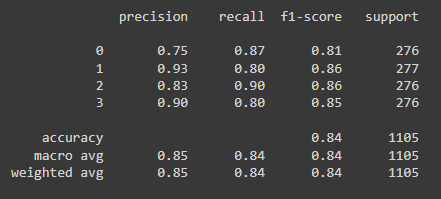

In [56]:
y_test[:5]

,category_num
3716,0
608,3
11172,3
1346,0
1356,2


the accuracy of predictions became low and it gives wrong predictions.

In [57]:
y_pred[:5]

array([0, 0, 3, 0, 2])

### **Attempt 3 : Use 1-gram to Tri-grams ( 1, 2 & 3)**

In [58]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



***1. See the difference with 1-gram & Bi-gram model***  ➿

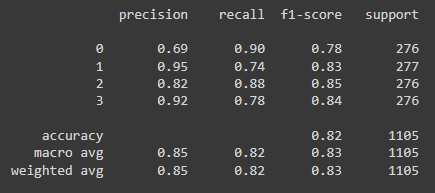

***2. See the difference with 1-gram / Bag Of Words (BOW) model***  ✅

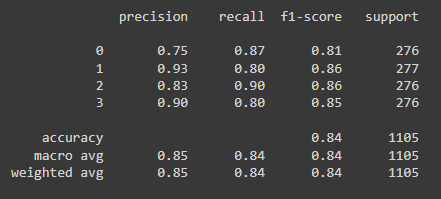

you can see the performance become lower when 'n' increase n-gram.

in each use case we need to select best model.

it can be bag of words or another

In [59]:
y_test[:5]

,category_num
3716,0
608,3
11172,3
1346,0
1356,2


the accuracy of predictions became low and it gives wrong predictions.

In [60]:
y_pred[:5]

array([0, 0, 3, 0, 2])


## **Use text pre-processing to remove stop words, punctuations and apply lemmatization**

You may wonder, we have not done any text-processing yet to remove stop words, punctuations, apply lemmatization etc. Well we wanted to train the model without any preprocessing first and check the performance. Now we will re-do same thing but with preprocessing of text

In [61]:
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess)

In [62]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


## **Build a model with pre processed text**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [64]:
print(X_train.shape)
X_train.head()

(4419,)


,preprocessed_txt
7589,ovulate woman prefer Images Penetration Images...
10442,scientist Discover Spooky Influence Baby Choices
8792,Olympic Race Walker step Propose Boyfriend Rio...
1733,Beloved Bipedal Bear name Pedals believe kill ...
2526,Elizabeth Smart give Birth Baby Girl Father say


In [65]:
y_train.value_counts()

,count
category_num,
3,1105
2,1105
0,1105
1,1104


In [66]:
y_test.value_counts()

,count
category_num,
1,277
0,276
3,276
2,276


### **Attempt 1 : Use 1-gram and Bi-grams (1 & 2)**

In [67]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.92      0.82      0.87       277
           2       0.83      0.92      0.87       276
           3       0.90      0.81      0.85       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



***1. See the difference with 1-gram & Bi-gram model***  ➿ **( before preorocess - RAW Text )**

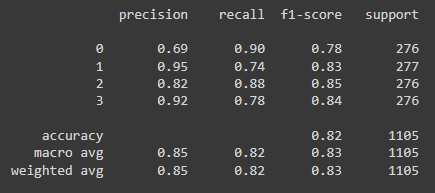

If you compare above classification report for (1,2) gram with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model

### **Plot confusion matrix**

In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[243,   8,  17,   8],
       [ 10, 228,  29,  10],
       [ 15,   2, 253,   6],
       [ 36,   9,   7, 224]])

Text(95.72222222222221, 0.5, 'Truth')

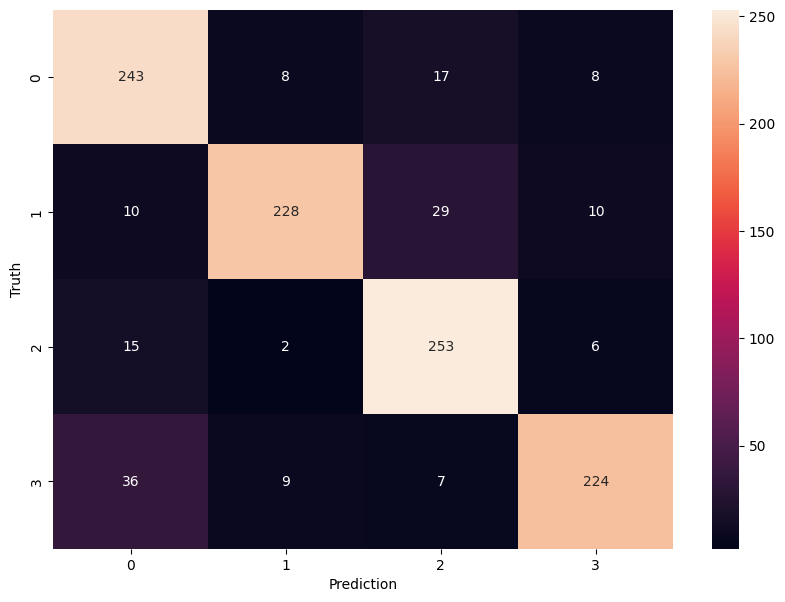

In [71]:
from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')